# Topic Modelling

<img src="../images/tm_topics_graph.png" alt="ml" style="width: 1000px;"/>

In [39]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['figure.dpi'] = 120 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Topic modelling
* Subfield of Natural Language Understanding
* Learning, recognizing, extracting _topics_ across a collection of documents
    * LSA: Latent Semantic Analysis
    * pLSA: Probabilistic LSA
    * LDA: Latent Dirichlet Allocation
        - Bayesian version of LSA
    * lda2vec: deep learning LDA
        - word2vec: LSE vector representation of words
        - lda2vec: jointly learns word, document, topic vectors

### Basic assumptions
* Semantics of our document are governed by hidden (latent) variables: __topics__
* Each __document__ consists of a mixture of __topics__
* Each __topic__ consists of a collection of __words__
<img src="../images/tm_basics.png" alt="ml" style="width: 1000px;"/>

## Latent Semantic Analysis (recap)
* Given m document and n words, build an $m$x$n$ _document-term_ matrix $A$
<img src="../images/tm_matrix2.png" alt="ml" style="width: 600px;"/>
* Values $w_{i,j}$: weight of term $j$ in document $i$ (e.g. _tf.idf_):
<img src="../images/tm_tfidf.png" alt="ml" style="width: 300px;"/>

* Matrix A is very sparse, very noisy, high-dimensional (and redundant)
* To find $t$ topics, compute a _low rank approximation_ of rank _t_
* _Truncated SVD_: compute SVD, keep _t_ largest singular values, first _t_ columns
$$A \approx U_t S_t V_t^T$$
<img src="../images/tm_svd.png" alt="ml" style="width: 400px;"/>
* Document-topic matrix $U_t$: represents documents as vector of _t_ topics
* Term-topic matrix $V_t$: represents terms as vector of _t_ topics


    

* Benefits: 
    * Embeds terms and documents in t-dimensional vector space
    * Use e.g. cosine similarity to compute: 
        - similarity between documents
        - similarity between terms
        - similarity between query terms and (parts of) documents 
* Drawbacks:
    * Embedding is not interpretable (what do topics mean?)
    * Needs really large set of documents and dictionary

### Simple implementation (sklearn)
```python
    # Build document-term matrix
    vectorizer = TfidfVectorizer(stop_words='english',
                                 use_idf=True, smooth_idf=True)
    # Truncated SVD
    svd_model = TruncatedSVD(n_components=100, # Has to be tuned
                             algorithm='randomized')
    # Compute
    vectorized = vectorizer.fit_transform(documents)
    docs = svd_model.fit_transform(vectorized)    # Computes U_t * S_t
    terms = svd_model.fit_transform(vectorized.T) # Computes V_t * S_t
```

#### Example (BBC News 11/03/2018)
__doc1__: America's new commercial astronaut capsule has completed its demonstration flight with a successful splashdown in the Atlantic Ocean. The SpaceX Dragon vehicle left the International Space Station after being docked there for the past week, and re-entered Earth's atmosphere. It had a heat-shield to protect it from the high temperatures of re-entry. Four parachutes brought it into soft contact with water about 450km from Cape Canaveral, Florida. The mission - which had no humans aboard, only a dummy covered in sensors - went according to plan. The Dragon has set the stage for the US space agency Nasa to approve the vehicle for crewed flights."

__doc2__: "Europe's quarter-century-long satellite data record of ice sheet changes in the Antarctic is secure into the future. It is possible because a new spacecraft tasked with observing what is going on in the polar south is finally producing very serviceable data. When the EU's Sentinel-3 mission was first launched in 2016, it struggled even to sense the continent's edge. That problem's been fixed and its observations of the ice have now been shown to be consistent and accurate."

__doc3__: "Muddy, coastal marshes are sleeping giants that could fight climate change, scientists say. A global study has shown that these regions could be awoken by sea level rise. Sea level is directly linked to the amount of carbon these wetlands store in their soil, the team reports in the journal Nature. Researchers studied the carbon locked away in cores of wetland mud from around the world. They say that the preservation of coastal wetlands is critical for mitigating global warming."

In [55]:
# Example with some recent BBC stories
doc1 = "America's new commercial astronaut capsule has completed its demonstration flight with a successful splashdown in the Atlantic Ocean. The SpaceX Dragon vehicle left the International Space Station after being docked there for the past week, and re-entered Earth's atmosphere. It had a heat-shield to protect it from the high temperatures of re-entry. Four parachutes brought it into soft contact with water about 450km from Cape Canaveral, Florida. The mission - which had no humans aboard, only a dummy covered in sensors - went according to plan. The Dragon has set the stage for the US space agency Nasa to approve the vehicle for crewed flights."
doc2 = "Europe's quarter-century-long satellite data record of ice sheet changes in the Antarctic is secure into the future. It is possible because a new spacecraft tasked with observing what is going on in the polar south is finally producing very serviceable data. When the EU's Sentinel-3 mission was first launched in 2016, it struggled even to sense the continent's edge. That problem's been fixed and its observations of the ice have now been shown to be consistent and accurate."
doc3=  "Muddy, coastal marshes are sleeping giants that could fight climate change, scientists say. A global study has shown that these regions could be awoken by sea level rise. Sea level is directly linked to the amount of carbon these wetlands store in their soil, the team reports in the journal Nature. Researchers studied the carbon locked away in cores of wetland mud from around the world. They say that the preservation of coastal wetlands is critical for mitigating global warming."
documents = [doc1, doc2, doc3]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english',
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=2, # Try 100 or greater
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
vectorized = vectorizer.fit_transform(documents)
docs = svd_model.fit_transform(vectorized)
terms = svd_model.fit_transform(vectorized.T)

Vectorized documents (in 2 dimensions/topics for plotting):

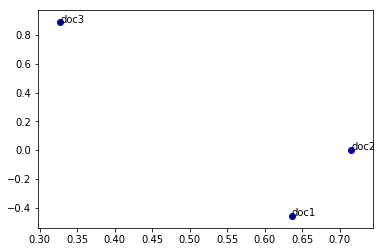

In [64]:
x, y = docs[:,0], docs[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
label = ["doc1","doc2","doc3"]

for i, txt in enumerate(label):
    ax.annotate(txt, (x[i],y[i]))

Vectorized terms:

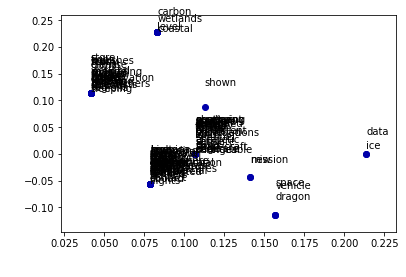

In [95]:
import random
x, y = terms[:,0], terms[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
label = vectorizer.get_feature_names()

for i, txt in enumerate(label):
    ax.annotate(txt, (x[i],y[i]+random.random() * 0.06))

## Probabilistic Latent Semantic Analysis (pLSA)
LSA: 
* Each __document__ consists of a collection of __topics__
* Each __topic__ consists of a collection of __words__

pLSA:
* Each __document__ is a (multinomial) _probability distribution_ over __topics__
    * E.g. 20% about topic 1, 50% topic 2, 30% topic 4
* Each __topic__ is a (multinomial) _probability distribution_ over __words__
    * E.g. 40% about word A, 50% word B, 10% word C

Can be represented on a simplex with barycentric coordinates:
* Doc 1: 30% about topic 1, 10% topic 2, 60% topic 3
* Topic 1: 5% about term A, 40% term B, 55% term C

<img src="../images/tm_simplex.png" alt="ml" style="width: 400px;"/>


### pLSA: Generative model
* Assumes that documents were generated by a (topic) model:
    - Choose a number of words in the document
    - Choose a topic distribution (_mixture_) over a fixed set of topics
    - Generate documents by:
        - Picking a topic _z_ according to document's topic distribution $P(z|d)$
        - Picking a word _w_ according to topics's word distribution $P(w|z)$
* Ignorant of syntax/grammar: just vocabulary words
        
<img src="../images/tm_generative.png" alt="ml" style="width: 1000px;"/>

Formally:
<img src="../images/tm_plda.png" alt="ml" style="width: 400px;"/>
* Joint probability of seeing $d$ and $w$ together: 
$$P(D,W) = P(D) \sum_Z{P(Z|D)P(W|Z)}$$

<img src="../images/tm_generative.png" alt="ml" style="width: 1000px;"/>

### pLSA: Inference (expectation maximization)
* Reverse process: Given a corpus of documents, 
    - learn the topic representation of _t_ topics in each document and word distribution in each topic
    - Backtrack from documents to identify topics that generated the corpus
* Randomly assign each word to one of _t_ topics
* For each document d, assume all _other_ topic distribution are correct, and calculate:
    * p(z|d): proportion of words in _d_ assigned to topic _z_
    * p(w|z): proportion of assignments to topic _z_ over all documents with word _w_
* Assign _w_ to topic _z_ with probability p(z|d) * p(w|z), repeat
<img src="../images/tm_inference.png" alt="ml" style="width: 1000px;"/>

#### Equivalent representations:
* Start with document with P(D), then generate topic with $P(z|d)$, then generate word with $P(w|z)$
$$P(D,W) = P(D) \sum_Z{P(Z|D)P(W|Z)}$$
* Start with topic with P(Z), then independently generate document with P(d|z) and word with $P(w|z)$
$$P(D,W) = \sum_Z{P(Z)P(D|Z)P(W|Z)}$$
* Now we see the parallel with LSA:

<img src="../images/tm_parallel1.png" alt="ml" style="float: left; width: 30%;"/>
<img src="../images/tm_parallel2.png" alt="ml" style="float: left; width: 30%;"/>



#### pLSA Benefits
* Neat way to explore / understand corpus
    * e-Discovery: which emails/tweets are relevant?
    * Social media: what are people saying about X?
    * Scientific data: what are main topics in literature
* Many applications:
    * Word sense disambiguation
    * Discourse segmentation
    * Machine translation
    * Object localization in images
    * Harmonic analysis of music
    * ...
* Handles polysemy (many meanings for same word)
* Inference is relatively dimple
        

#### pLSA Drawbacks:
* We have no model parameters to model $P(D)$, we don't know how to assign probabilities to documents
* The number of parameters grows linearly with the number of documents: prone to overfitting

## Latent Dirichlet Allocation (LDA)
* Bayesian version of pLSA, solves remaining drawbacks
* Uses _Dirichlet prior_ for $P(z|d)$
* Dirichlet distribution is a distribution over our earlier multinomial distributions
* Hyperparameter $\alpha$ (can be different per topic):
    - Low $\alpha$: document belongs to only few topics.
    - $\alpha=1$: everything equally likely
    - High $\alpha$: document belongs to many (or all) topics.

Sampling from this distribution, assuming 3 topics (full code in notebook):

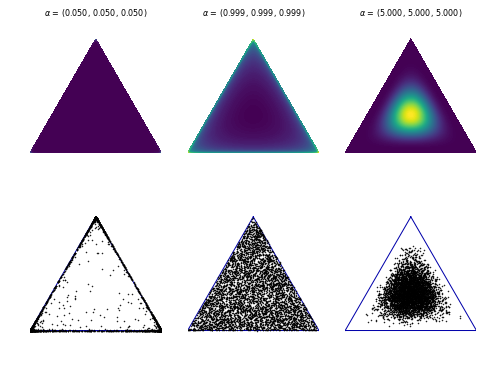

In [108]:
# Code based on example by Thomas Boggs
import matplotlib.tri as tri
from functools import reduce

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

f = plt.figure(figsize=(8, 6))
alphas = [[0.05] * 3,
          [0.999] * 3,
          [5] * 3]
          #[2, 5, 15]]
for (i, alpha) in enumerate(alphas):
    plt.subplot(2, len(alphas), i + 1)
    dist = Dirichlet(alpha)
    draw_pdf_contours(dist)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, fontdict={'fontsize': 8})
    plt.subplot(2, len(alphas), i + 1 + len(alphas))
    plot_points(dist.sample(5000))

* We also define a Dirichlet distribution over $P(w|z)$
* Equivalent hyperparameter $\beta$:
    - Low $\beta$: every topic has only few words.
    - High $\beta$: every topic has many words.
* Formally, with topic distribution $\theta$ and word distribution $\varphi$:
    - for K topics, N words, M documents
<img src="../images/tm_lda.png" alt="ml" style="width: 400px;"/>

### LDA as a generative model
* Sample distribution $\theta_i$ from Dir($\alpha$)
    - $\theta_i,k$: probability that document _i_ has topic _k_)
* Sample distribution $\varphi_k$ from Dir($\beta$)
    - $\varphi_k,w$: probability that topic _k_ has word _w_
* Sample topic _z_ from $\theta_i$
* Sample word _w_ from $\varphi_k$

<img src="../images/tm_lda.png" alt="ml" style="width: 400px;"/>


### LDA inference
* Inference is similar to what we saw for pLSA
* For every new document, we can sample from the Dirichlet distribution
    * Hence, generalizes better to new documents
* We still need to choose the number of topics and the $\alpha$,$\beta$ hyperparameters

## Examples
Many implementations, most useful:
- gensim
- sklearn.decomposition.LatentDirichletAllocation

gensim needs to be installed. We also add wordcloud to visualize the topics. 
nltk is usedul for preprocessing (e.g. stemming)
```
pip install gensim
pip install wordcloud
pip install nltk
```

### News reports
* Data from the Associated Press (AP), already in the data folder
* Load a representation via `corpora.BleiCorpus`
* Use `models.ldamodel.LdaModel` to run LDA

``` python
model = models.ldamodel.LdaModel(
    corpus, num_topics=100, 
    id2word=corpus.id2word, alpha=None) # default alpha
```

In [113]:
import gensim
from gensim import corpora, models, matutils
NUM_TOPICS = 100
corpus = corpora.BleiCorpus('../data/ap/ap.dat', '../data/ap/vocab.txt')
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

* How many topics does every document have?

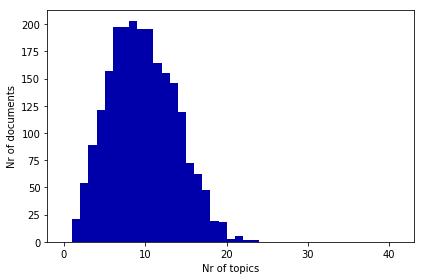

In [118]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()

We can do the same after changing the $\alpha$ value: 

[WARNING] [12:42:33:gensim.models.ldamodel] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


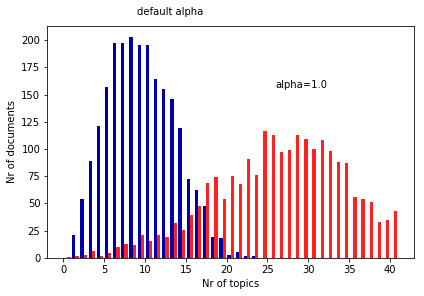

In [121]:
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()

What is the distribution of topics in the first document?

In [122]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(7, 0.048612498), (8, 0.015723428), (31, 0.35472104), (34, 0.13508442), (38, 0.13842407), (55, 0.039698716), (60, 0.013031449), (63, 0.041657068), (76, 0.011997577), (84, 0.054972194), (86, 0.0135803055), (88, 0.101728715)]


A better way to explore the data is to identify the most discussed topic, i.e., the one with the highest total weight.
* Get the top 64 words for this topic.
* Use `max_words` to set the number of words we want (default is 10).
* Visualize the results in a word cloud

In [123]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

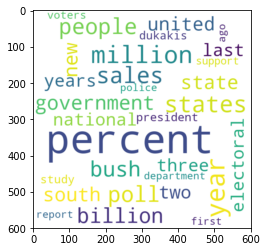

In [130]:
from wordcloud import WordCloud
words = model.show_topic(max_topic, 64)
wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))
fig,ax = plt.subplots()
ax.imshow(wc, interpolation="bilinear");

# Modeling Wikipedia

* We can do the same on a large set of articles from Wikipedia. 
* Execute the `download_wp` script in the data folder.
    - Downloads and preprocessed the data. 
    - Will take a few hours and over 14GB of disk space.

In [ ]:
import gensim
if not path.exists('wiki_lda.pkl'):
    import sys
    sys.stderr.write('''\
This script must be run after wikitopics_create.py!

That script creates and saves the LDA model (this must onlly be done once).
This script is responsible for the analysis.''')
    
# Load the preprocessed Wikipedia corpus (id2word and mm)
id2word = gensim.corpora.Dictionary.load_from_text(
    'data/wiki_en_output_wordids.txt.bz2')
mm = gensim.corpora.MmCorpus('data/wiki_en_output_tfidf.mm')

# Load the precomputed model
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

topics = np.load('topics.npy', mmap_mode='r')

In [ ]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.3}'.format(np.mean(lens)))
print('Percentage of articles mentioning less than 10 topics: {0:.1%}'.format(np.mean(lens <= 10)))

# Weights will be the total weight of each topic
weights = topics.sum(0)

Retrieve the most heavily used topic and plot it as a word cloud:

In [ ]:
words = model.show_topic(weights.argmax(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))

fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

<img src="../images/tm_wikipedia.png" alt="ml" style="width: 400px;"/>

## LDA in Deep Learning: lda2vec
* lda2vec is an extension of word2vec and LDA that jointly learns word, document, and topic vectors.
* builds on top of the skip-gram model of word2vec to generate word vectors.
    - Neural net that learns a word embedding by trying to use the input word to predict surrounding context words
    - See http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
* instead of using the word vector directly to predict context words, we leverage a context vector to make the predictions. 
* this context vector is created as the sum of two other vectors: the word vector and the document vector.    

* The document vector is a weighted combination of two other components:
    - the document weight vector, representing the “weights” of each topic in the document
    - the topic matrix, representing each topic and its corresponding vector embedding
* Together, the document vector and the word vector generate “context” vectors for each word in the document. 
* lda2vec not only learns word embeddings (and context vector embeddings) for words,
* it simultaneously learns topic representations and document representations

<img src="../images/tm_lda2vec.png" alt="ml" style="width: 400px;"/>

<img src="../images/tm_lda2vec2.png" alt="ml" style="width: 400px;"/>

## Further reading on lda2vec
* [blog post](https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=)
* [Code](https://github.com/cemoody/lda2vec)
* [Example](http://nbviewer.jupyter.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb)
              